In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [89]:
df = pd.read_excel(R"./../data/HousingData.xlsx")

target = "PRICE"
features = df.columns.drop(target).tolist()

X = df[features].copy()
y = df[target].copy()

df.head(10)


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24000
1,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,311,15.2,12.43,22900
2,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,311,15.2,19.15,27100
3,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,311,15.2,29.93,16500
4,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,311,15.2,17.10,18900
5,0.22489,12.5,7.87,0.524,6.377,94.3,6.3467,311,15.2,20.45,15000
6,0.11747,12.5,7.87,0.524,6.009,82.9,6.2267,311,15.2,13.27,18900
7,0.09378,12.5,7.87,0.524,5.889,39.0,5.4509,311,15.2,15.71,21700
8,0.62976,0.0,8.14,0.538,5.949,61.8,4.7075,307,21.0,8.26,20400
9,0.63796,0.0,8.14,0.538,6.096,84.5,4.4619,307,21.0,10.26,18200


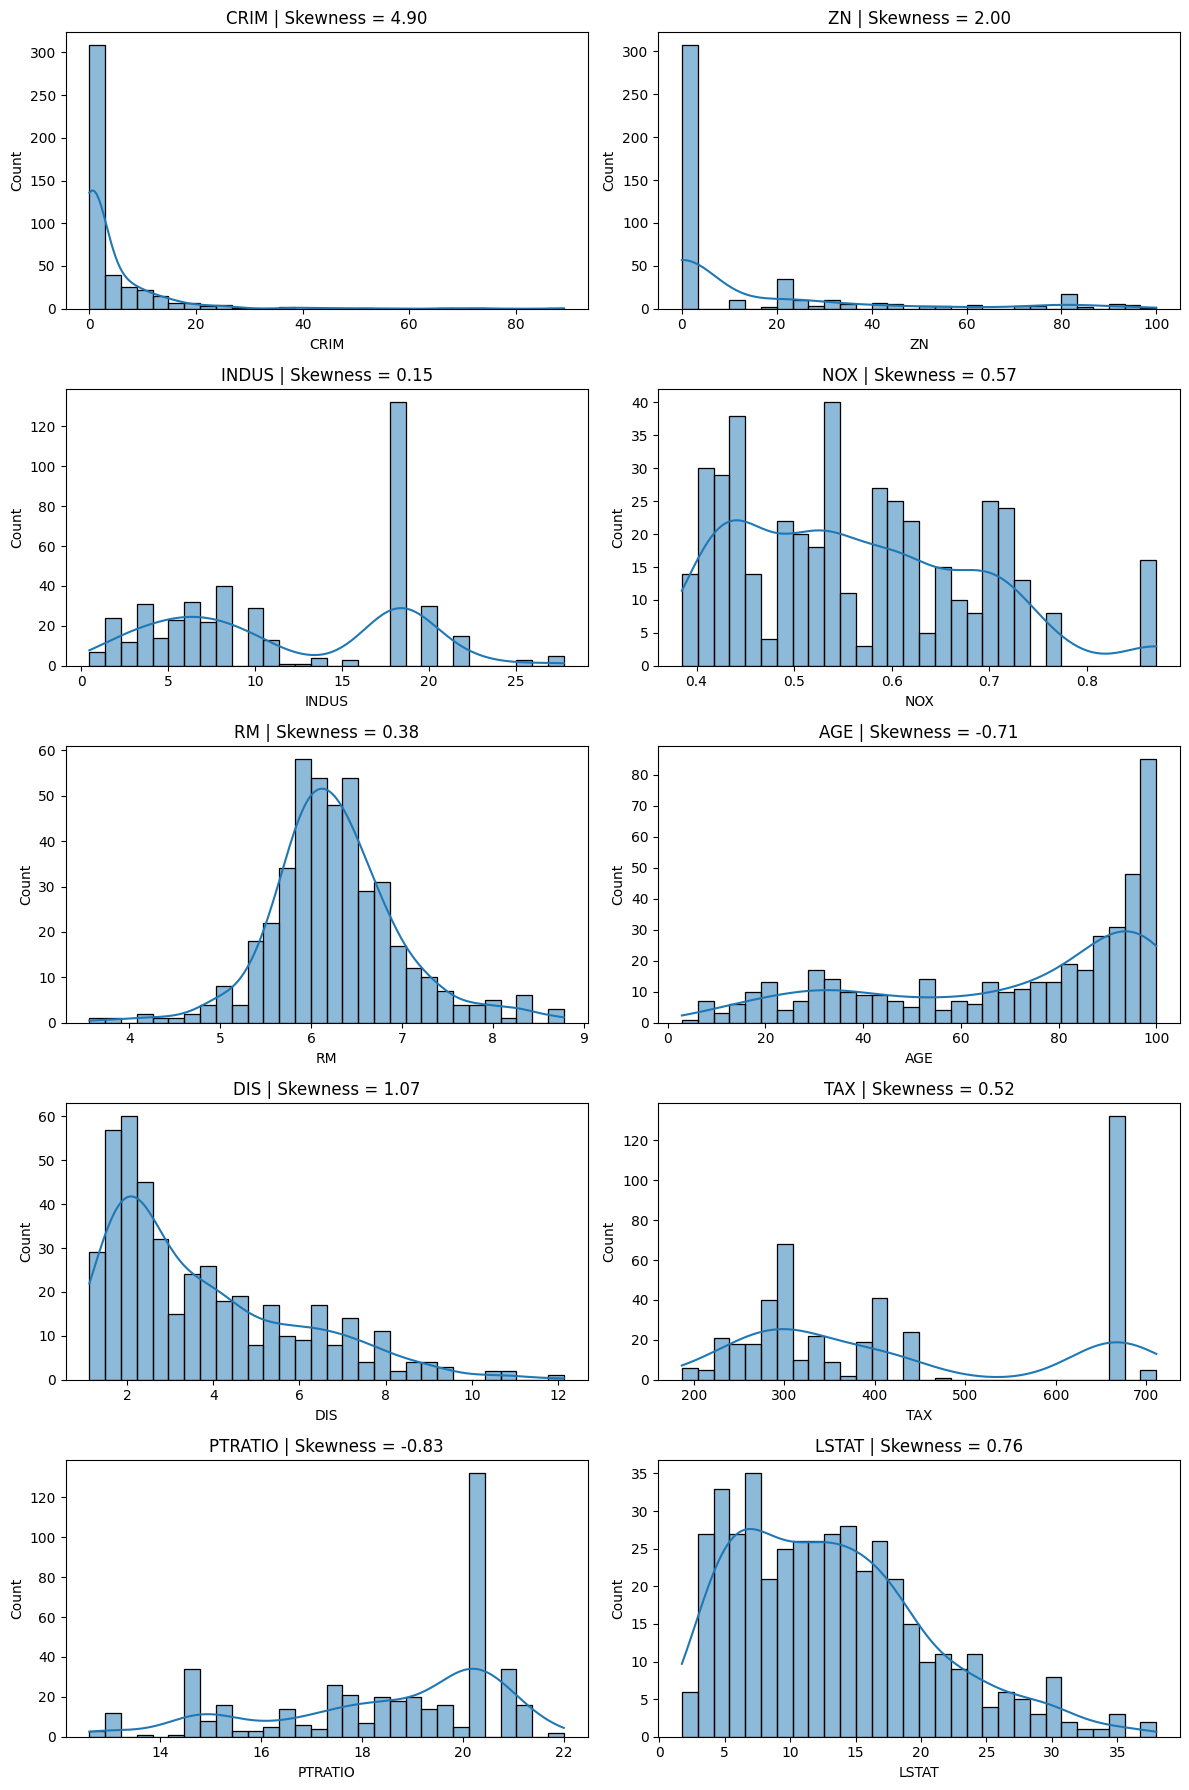

Skewed features (|skew| > 1): ['CRIM', 'ZN', 'DIS']


In [90]:
def plot_all_histograms(df, features):
    skewed = []
    plt.figure(figsize=(12, 18))
    
    for i, col in enumerate(features):
        plt.subplot(5, 2, i + 1)
        sns.histplot(df[col], kde=True, bins=30)
        skew_val = df[col].skew()
        plt.title(f"{col} | Skewness = {skew_val:.2f}")
        if abs(skew_val) > 1:
            skewed.append(col)
    
    plt.tight_layout()
    plt.show()
    return skewed

log_skewed_cols = plot_all_histograms(X, features)
print("Skewed features (|skew| > 1):", log_skewed_cols)


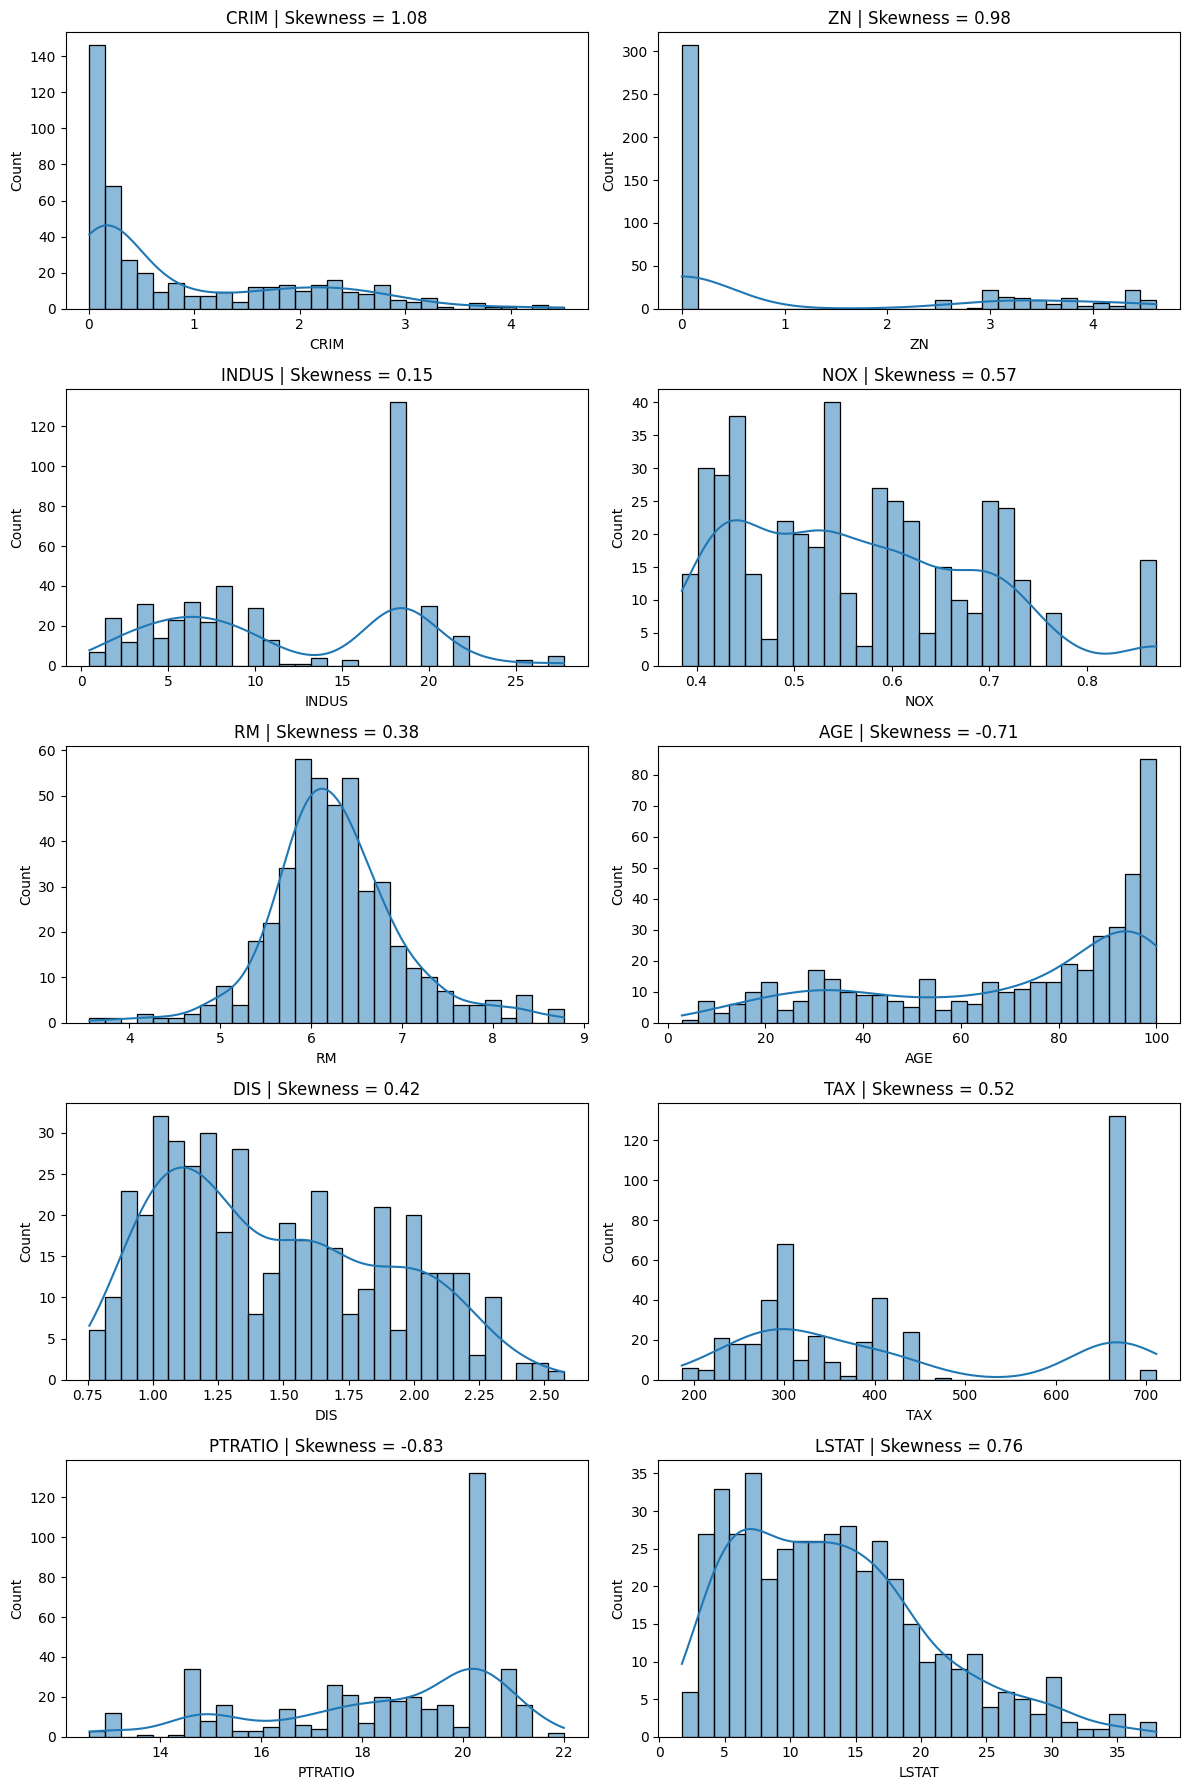

Skewed features (|skew| > 1): ['CRIM']


In [91]:
X_log = X.copy()
for col in log_skewed_cols:
    X_log[col] = np.log1p(X_log[col])  # log1p safely handles zero

log_skewed_cols = plot_all_histograms(X_log, features)
print("Skewed features (|skew| > 1):", log_skewed_cols)


In [92]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_log), columns=X_log.columns, index=X_log.index)
X_scaled.head()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,-0.874774,1.094970,-1.378809,-0.218470,0.417671,-0.181514,0.390552,-0.778020,-1.404778,-1.117661
1,-0.800169,0.892694,-0.560514,-0.335245,-0.359269,-0.132440,0.986220,-0.689631,-1.449104,-0.107841
2,-0.752148,0.892694,-0.560514,-0.335245,-0.138469,0.901634,1.121757,-0.689631,-1.449104,0.803030
3,-0.698192,0.892694,-0.560514,-0.335245,-0.885049,1.038342,1.165782,-0.689631,-1.449104,2.264219
4,-0.731162,0.892694,-0.560514,-0.335245,-0.370309,0.544090,1.328994,-0.689631,-1.449104,0.525160


In [93]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Optional: get names of new features
poly_feature_names = poly.get_feature_names_out(X_scaled.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names, index=X_scaled.index)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)


In [95]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [96]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: ${train_rmse:.2f}")
print(f"Test RMSE:  ${test_rmse:.2f}")


Train RMSE: $2693.14
Test RMSE:  $3267.91


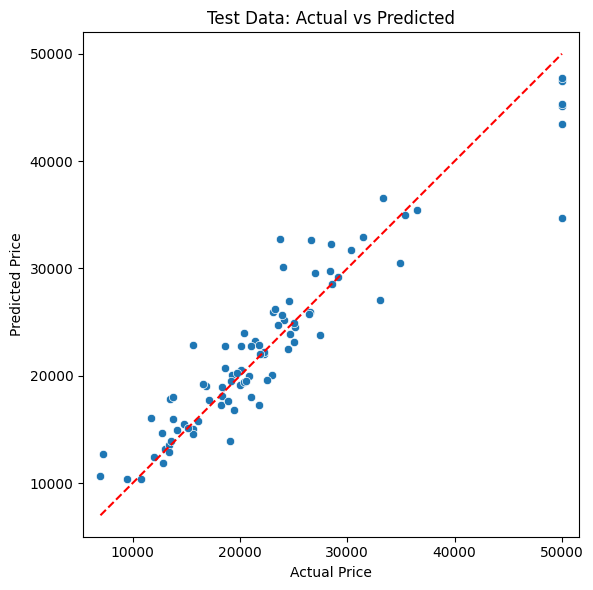

In [97]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Test Data: Actual vs Predicted")
plt.axis("equal")
plt.tight_layout()
plt.show()


In [98]:
x_point = {
    "CRIM": 4.1,
    "ZN": 13.5,
    "INDUS": 11.8,
    "NOX": 0.55, 
    "RM": 5,
    "AGE": 68, 
    "DIS": 3.5, 
    "TAX": 385, 
    "PTRATIO": 15.7, 
    "LSTAT": 13.4
}

# Step 1: Create DataFrame
x_point_df = pd.DataFrame([x_point])

# Step 2: Apply log transform
for col in log_skewed_cols:
    x_point_df[col] = np.log1p(x_point_df[col])

# Step 3: Scale
x_point_scaled = pd.DataFrame(scaler.transform(x_point_df), columns=features)

# Step 4: Polynomial transform
x_point_poly = poly.transform(x_point_scaled)
df_x_point_poly = pd.DataFrame(x_point_poly, columns=poly_feature_names)

# Step 5: Predict
y_pred = model.predict(df_x_point_poly)
print(f"Predicted house price: ${y_pred[0]:,.2f} ± {train_rmse:.2f}")


Predicted house price: $39,085.49 ± 2693.14
